# Interpolacijski polinomi


Neka je zadana $n+1$ točka

$$
T_i=(x_i,y_i), \quad i=0,1,\ldots,n,\quad x_i\neq x_j.
$$

## Standradna baza

Kroz zadane točke prolazi _interpolacijski polinom_ $p_n(x)$. Koeficijenti polinoma zadovoljavaju 
sustav linearnih jednadžbi $p_n(x_i)=y_i$, $i=0,\ldots,n$, odnosno

$$
\begin{bmatrix} 
1 & x_0 & x_0^2 & x_0^3 & \cdots & x_0^n \\
1 & x_1 & x_1^2 & x_1^3 & \cdots & x_1^n \\
\vdots & & & & \vdots \\
1 & x_n & x_n^2 & x_n^3 & \cdots & x_n^n \\
\end{bmatrix}
\begin{bmatrix}a_0\\ a_1 \\ \vdots \\ a_n\end{bmatrix}
=\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n\end{bmatrix}
$$

Matrica sustava $A$ se zove _Vandermonde-ova matrica_. Njena determinanta dana je formulom

$$ 
\mathop{\mathrm{det}}(A)= \prod_{0\leq j<i\leq n}(x_i-x_j).
$$

Kako su sve apscise različite ($x_i\neq x_j$ za $i\neq j$), vrijedi $\mathop{\mathrm{det}}(A)\neq 0$ pa je matrica $A$ regularna i zadani suatav ima jedinstveno riješenje - dakle, 
> interpolacijski polinom je __jedinstven__.

In [1]:
using Polynomials
using SpecialMatrices
using Winston


Use "AbstractVecOrMat{T}(" instead.
  likely near /home/slap/.julia/v0.4/IniFile/src/IniFile.jl:24
  likely near /home/slap/.julia/v0.4/IniFile/src/IniFile.jl:24


In [14]:
n=6
x=rand(n)
y=rand(n)

6-element Array{Float64,1}:
 0.206451
 0.255176
 0.881577
 0.61247 
 0.976924
 0.901457

In [15]:
A=Vandermonde(x)

6x6 SpecialMatrices.Vandermonde{Float64}:
 1.0  0.458629   0.210341    0.0964683    0.0442432    0.0202912 
 1.0  0.803816   0.64612     0.519362     0.417471     0.33557   
 1.0  0.427379   0.182653    0.0780618    0.033362     0.0142582 
 1.0  0.0602095  0.00362519  0.000218271  1.3142e-5    7.91274e-7
 1.0  0.465388   0.216586    0.100796     0.0469093    0.021831  
 1.0  0.106302   0.0113001   0.00120122   0.000127692  1.35739e-5

In [16]:
a=full(A)\y

6-element Array{Float64,1}:
     74.9034   
  -2365.72     
  23634.3      
 -88275.7      
      1.36608e5
 -73386.7      

In [17]:
p=Poly(a)

Poly(74.90340155206331 - 2365.7191910340807x + 23634.28323857499x^2 - 88275.73953230813x^3 + 136607.6703013651x^4 - 73386.66286273122x^5)

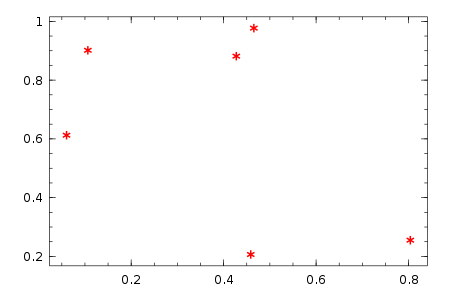

In [18]:
plot(x,y,"r*")

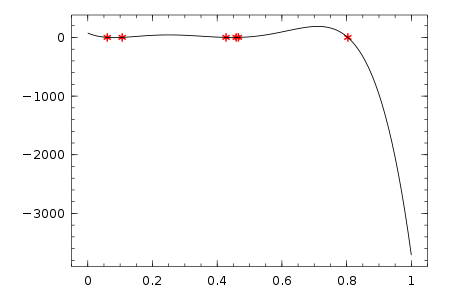

In [19]:
xx=linspace(0,1,100)
pp=polyval(p,xx)
plot(x,y,"r*",xx,pp)

Za rješavanje zadanog sustava standardnim putem potrebno je $O(n^3)$ računskih operacija, no postoje metode kojima se Vandermondeovi sustavi mogu riješiti s $O(n^2)$ operacija.

Za izvrednjavanje polinoma u nekoj točki potrebno je $2n$ operacija (Hornerova shema).

Vandermondeova matrice uglavnom imaju veliku kondiciju pa ovaj način računanja koeficijenata polinoma može biti nestabilan.
Stoga se koriste i druge metode za računanje i izvredjavanje interpolacijskih polinoma.

## Lagrange-ov interpolacijski polinom

Definirajmo $n+1$ polinom stupnja $n$:

$$
L_j(x)=\prod_{{i=0}\atop {i\neq j}}^n \frac{x-x_i}{x_j-x_i}.
$$

Vrijedi 

$$
L_j(x_i)=\begin{cases}0, \quad i\neq j \\ 1,\quad i=j \end{cases}
$$

pa je 

$$
p_n(x)=y_0\, L_0(x)+y_1 \, L_1(x)+\cdots + y_n\,  L_n(x).
$$

Za računanje nazivnika polinoma prvi put je potrebno $O(n^2)$ operacija, ali se potom vrijednost 
$p_n(x)$ računa s $O(n)$ operacija. 

Navodimo implementaciju algoritma koja nije optimalno brza.

In [28]:
cond(A)

855490.4550578314

In [29]:
L(t)=sum(y.*[prod(t-x[[1:j-1;j+1:end]])/prod(x[j]-x[[1:j-1;j+1:end]]) for j=1:n])

L (generic function with 1 method)

In [30]:
pL=Array(Float64,length(xx))
for i=1:length(xx)
    pL[i]=L(xx[i])
end

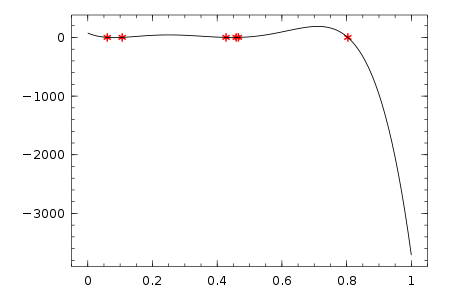

In [34]:
plot(x,y,"r*",xx,pL)

In [32]:
norm(pp-pL,Inf)

2.7143869374413043e-9

In [33]:
norm(abs(pp-pL)./abs(pp),Inf)

1.883339009408819e-11

## Newton-ov interpolacijski polinom

Kod ovog polinoma koristi se baza

$$
1, x-x_0, (x-x_0)(x-x_1), (x-x_0)(x-x_1)(x-x_2),\ldots,(x-x_0)(x-x_1)\cdots (x-x_{n-1})
$$
pa je interpolacijski polinom dan s

$$
p_n(x)=c_0 + c_1(x-x_0)+c_2(x-x_0)(x-x_1)+\cdots +c_n(x-x_0)(x-x_1)\cdots (x-x_{n-1}).
$$

Koeficijenti interpolacijskog polinoma su rješenje sustava jednadžbi $Lc=y$, odnosno

$$
\begin{bmatrix} 
1 & 0 & 0 & 0 & \cdots & 0 \\
1 & x_1-x_0 & 0 & 0 & \cdots & 0 \\
1 & x_2-x_0 & (x_2-x_0)(x_2-x_1) & 0 & \cdots & 0 \\
\vdots & & & & \vdots \\
1 & x_n-x_0 & (x_n-x_0)(x_n-x_1) & (x_n-x_0)(x_n-x_1)(x_n-x_2) & \cdots & (x_n-x_0)\cdots (x_n-x_{n-1}) \\
\end{bmatrix}
\begin{bmatrix}c_0\\ c_1 \\ c_2 \\\vdots \\ a_n\end{bmatrix}
=\begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ \vdots \\ y_n\end{bmatrix}.
$$

Za formiranje donje trokutaste matrice $L$ potrebno je $O(n^2)$ operacija. Za računanje koeficijenata $c_0,\ldots,c_n$ potrebno je $O(n^2)$ operacija (rješavanje donje trokutastog sustava) i to rješenje je __stabilno__.

Za računanje $p_n(x)$ koristi se postupak koji je vrlo sličan Hornerovoj shemi. 